# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [119]:
# this will help in making the Python code more structured automatically (help adhere to good coding practices)
#%load_ext nb_black

import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.metrics import make_scorer

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
)

## Data Overview

- Observations
- Sanity checks

### Loading the dataset

In [120]:
df = pd.read_csv("INNHotelsGroup.csv")

In [121]:
data = df.copy()

### View the first and last 5 rows of the dataset.

In [122]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


### Understand the shape of the dataset.

In [123]:
data.shape

(36275, 19)

* The dataset has 36275 rows and 19 columns.

### Check the data types of the columns for the dataset.

In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

- booking_status is the dependent variable which is an object type.
- There are three dependent variables of object type while the rest variables are numeric in nature.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

### Univariate Analysis

In [125]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Booking_ID,36275,36275,INN00001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_adults,36275.00000,NaN,NaN,NaN,1.84496,0.51871,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36275.00000,NaN,NaN,NaN,0.10528,0.40265,0.00000,0.00000,0.00000,0.00000,10.00000
no_of_weekend_nights,36275.00000,NaN,NaN,NaN,0.81072,0.87064,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,36275.00000,NaN,NaN,NaN,2.20430,1.41090,0.00000,1.00000,2.00000,3.00000,17.00000
type_of_meal_plan,36275,4,Meal Plan 1,27835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
required_car_parking_space,36275.00000,NaN,NaN,NaN,0.03099,0.17328,0.00000,0.00000,0.00000,0.00000,1.00000
room_type_reserved,36275,7,Room_Type 1,28130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lead_time,36275.00000,NaN,NaN,NaN,85.23256,85.93082,0.00000,17.00000,57.00000,126.00000,443.00000
arrival_year,36275.00000,NaN,NaN,NaN,2017.82043,0.38384,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000


In [126]:
#What are the busiest months in the hotel?
print("The busiest month in the hotel is",data['arrival_month'].mode())
print("The busiest year in the hotel is",data['arrival_year'].mode())

The busiest month in the hotel is 0    10
Name: arrival_month, dtype: int64
The busiest year in the hotel is 0    2018
Name: arrival_year, dtype: int64


In [127]:
#What percentage of bookings are canceled?
from typing import Counter
c = Counter(data['booking_status'])
print("The prcentage of canceled booking is",c['Canceled']/sum(c.values()))
print("The prcentage of not-canceled booking is",c['Not_Canceled']/sum(c.values()))

The prcentage of canceled booking is 0.32763611302549966
The prcentage of not-canceled booking is 0.6723638869745003


**Observations**
- The percentage of not_canceled bookings is 67% while 33% of the bookings were canceled.
- The mean number of adults is 1.84 with 0.52 standar deviation, while, the mean numer of children is 0.11 with 0.4 standard deviation.
-  Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel is between 0 to 7 nights. However, the number of weekend nights range from 0 to 17 nights.
-  The mean number of days between the date of booking and the arrival date is 85 days.
-  Mosst of the guests come from online.
- the percentage of repeated guest is about 3%.
- The mean number of previous bookings that were canceled by the customer prior to the current booking is 0.02 while the mean number of previous bookings that were canceled is 0.15.
- The average price of rooms is 103.42 with 35 standard deviation.
- The most common meal plan is breakfast.
- Only 3% of the guests required car parking space.
- The most type of room reserved by the customer is Room_Type1.
- The range of total number of special requests made by the customer is range from 0 to 5.
- The busiest month in the hotel is October while the busiest year is 2018.

In [128]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [129]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

#### Number of adults

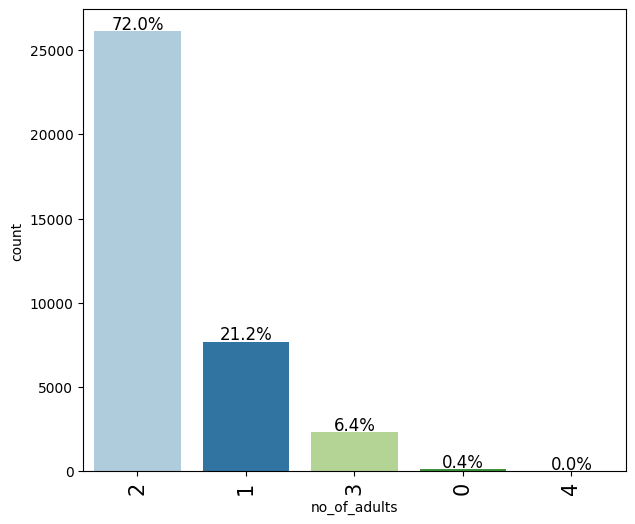

In [130]:
labeled_barplot(data, "no_of_adults",perc=True)

**Observation**
- 72% of the number of adults is 2.


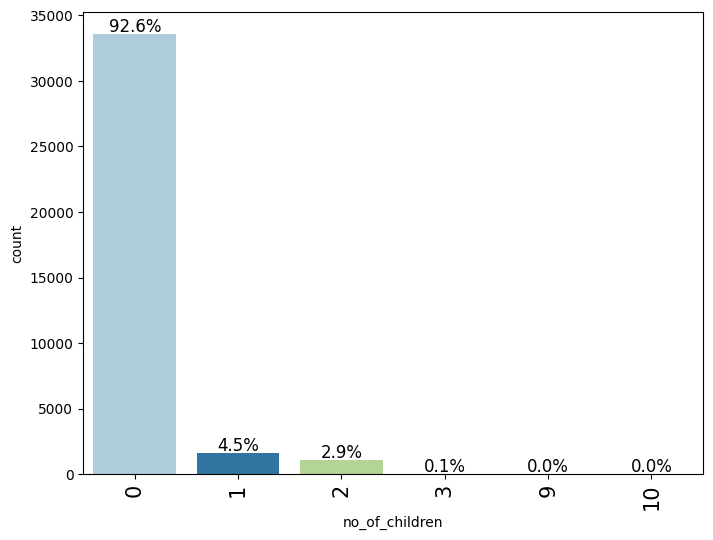

In [131]:
labeled_barplot(data, "no_of_children",perc=True)

**Observation:**
- About 93% of the guests with no kids and 7% of the guests with 1 or 2 kids.

#### Type of meal plan

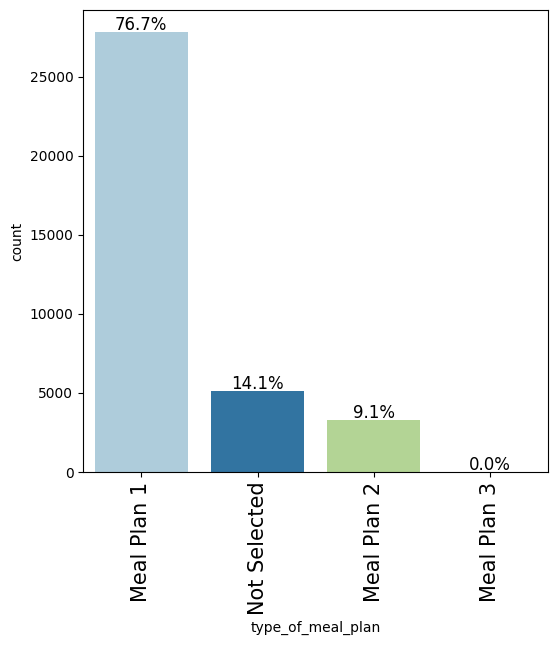

In [132]:
labeled_barplot(data, "type_of_meal_plan",perc=True)

**Observation:**
- About 77% of meal plan booked by the customer is breakfast while 9% booked breakfast and one other meal. 14% No meal plan selected.

### Number of weekend nights

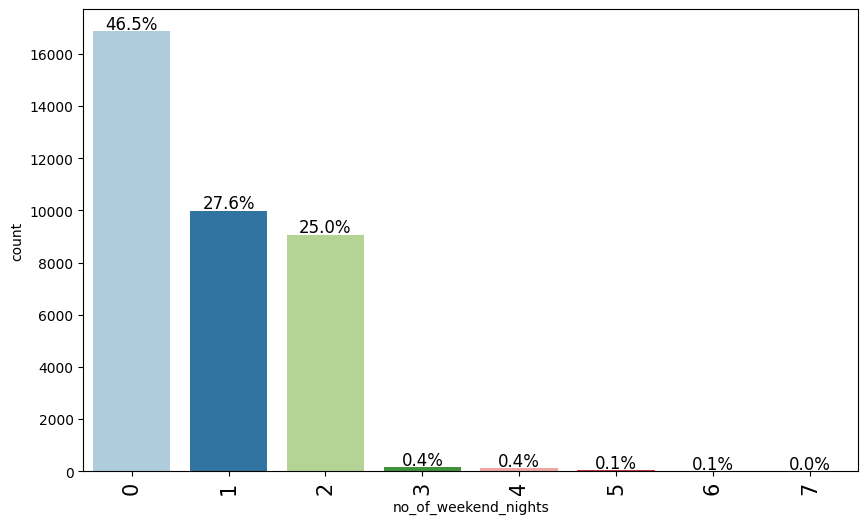

In [133]:
labeled_barplot(data, "no_of_weekend_nights",perc=True)

**Observation:**
- 46.5% of the guest did not stayed or booked to stay at the hotel during the weekend nights.
- 27.6% of the guest booked one night to stay at the hotel during the weekend nights.
- 25% of the guest booked two nights to stay at the hotel during the weekend nights.
- 10% of the guest booked 3-6 nights to stay at the hotel during the weekend nights.

### Number of week nights

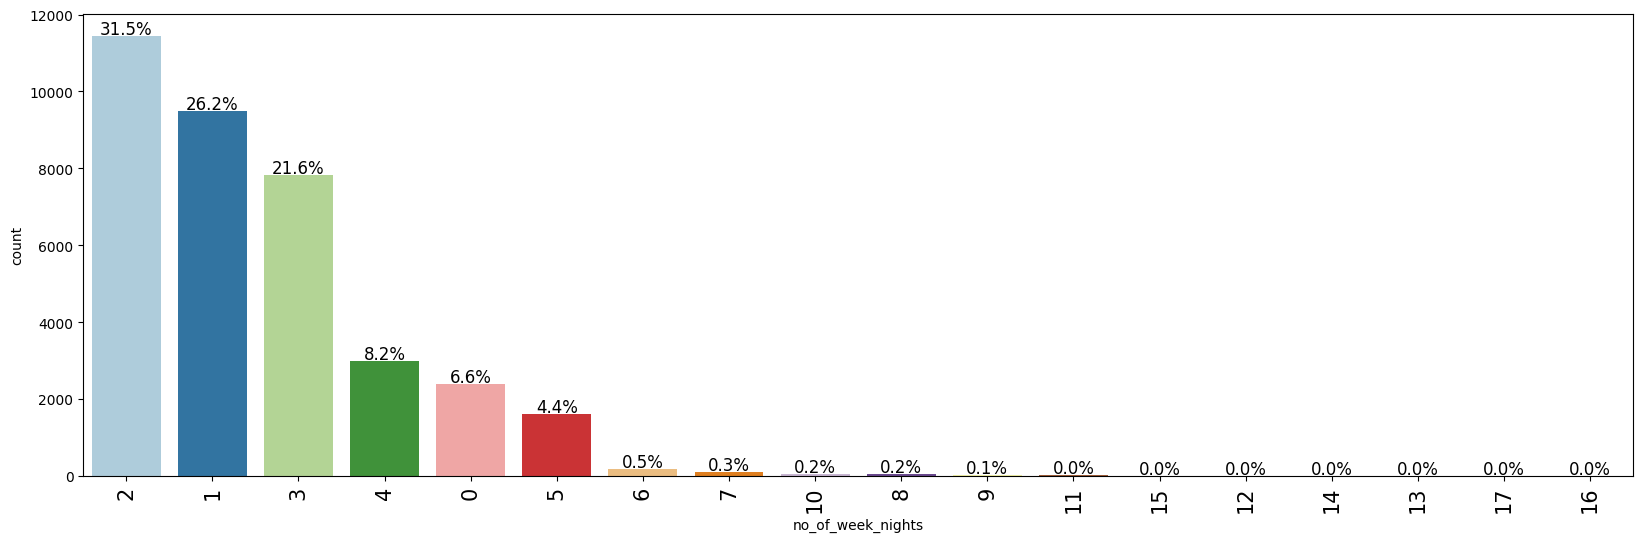

In [134]:
labeled_barplot(data, "no_of_week_nights",perc=True)

**Observation:**
- 31.5% of the guest booked two night to stay at the hotel during the week nights.
- The percentage of guests booked one or three nights at the hotel during the week nights are 26% and 22% respectively.
- 7% of the guest did not stayed or booked to stay at the hotel during the week nights.
- Around 14% of the guest booked 4 nights or more to stay at the hotel during the weekend nights.

### Required car parking space

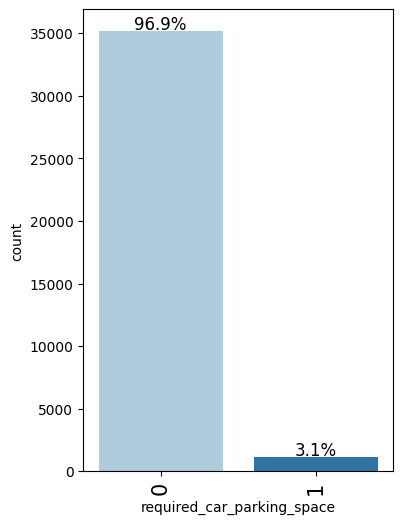

In [135]:
labeled_barplot(data, "required_car_parking_space",perc=True)

**Observation:**
- 97% of the guests did not required car paring space.

### Room type reserved

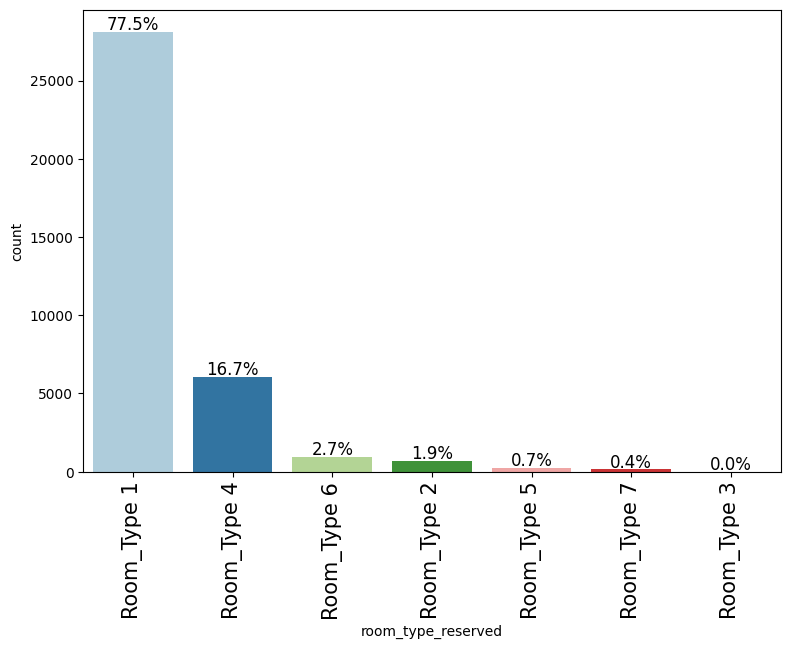

In [136]:
labeled_barplot(data, "room_type_reserved",perc=True)

**Observation:**
- 78% of guests reserved Type1 room while 17% reserved Type2.


### Market segment type

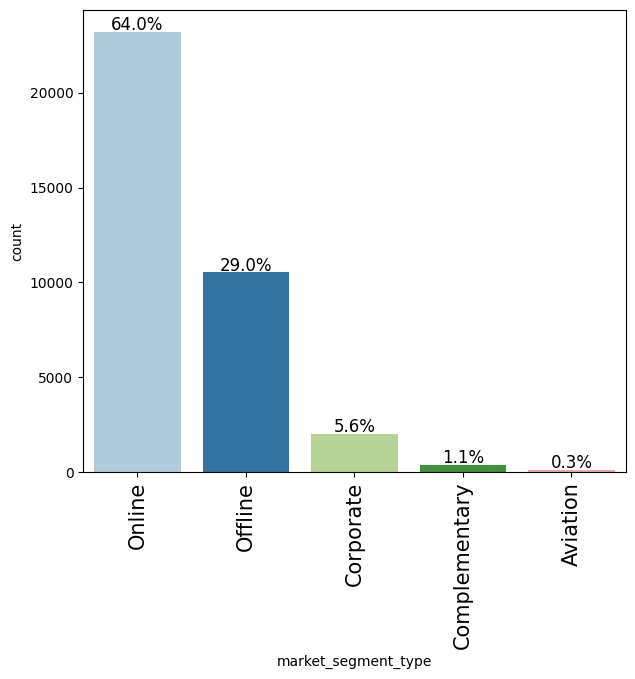

In [137]:
labeled_barplot(data, "market_segment_type",perc=True)

**Observations:**
- 64% of the Market segment is online and 29% is offline. The corporate segment is only 6%.

### Repeated_guests

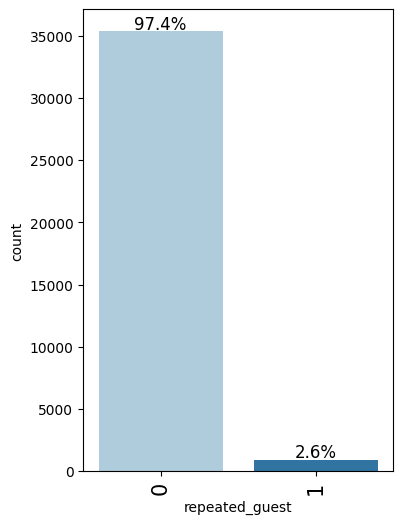

In [138]:
labeled_barplot(data, "repeated_guest",perc=True)

**Observation:**
- 97% of the customers non repeated guests.

### Number of special requests

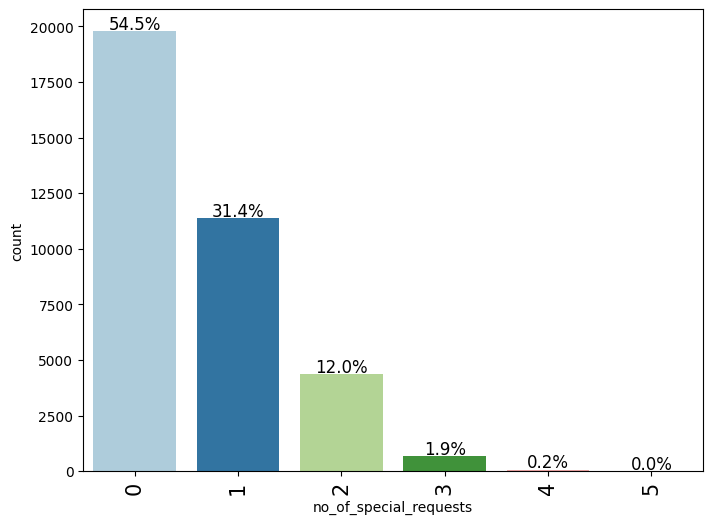

In [139]:
labeled_barplot(data,"no_of_special_requests",perc=True)

**Observations:**
- About 55% of the guests have no special requests.
- only one special request made by 31% of the customers.
- 14% of the customers have 2 to 3 special requests.

### Booking_status

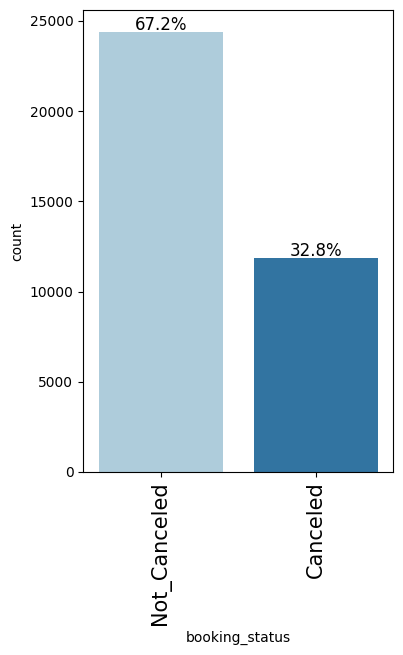

In [140]:
labeled_barplot(data,"booking_status",perc=True)

- 67% of the booking was not canceled and 33% was canceled.

### Lead_time

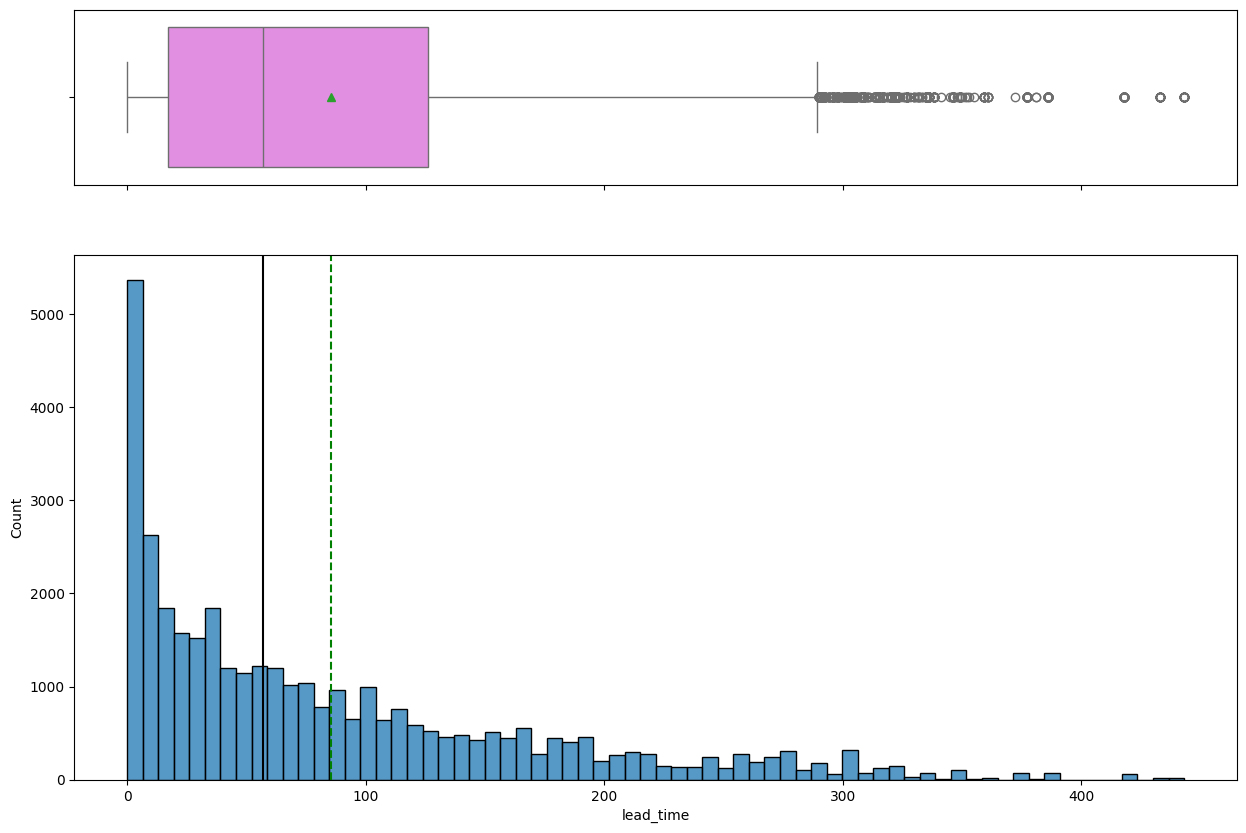

In [141]:
histogram_boxplot(data, "lead_time")

**Observation:**
The distribution of the lead time is right skewed since the mean is greater than the median and there are large outliers.

### Number of previous cancellations

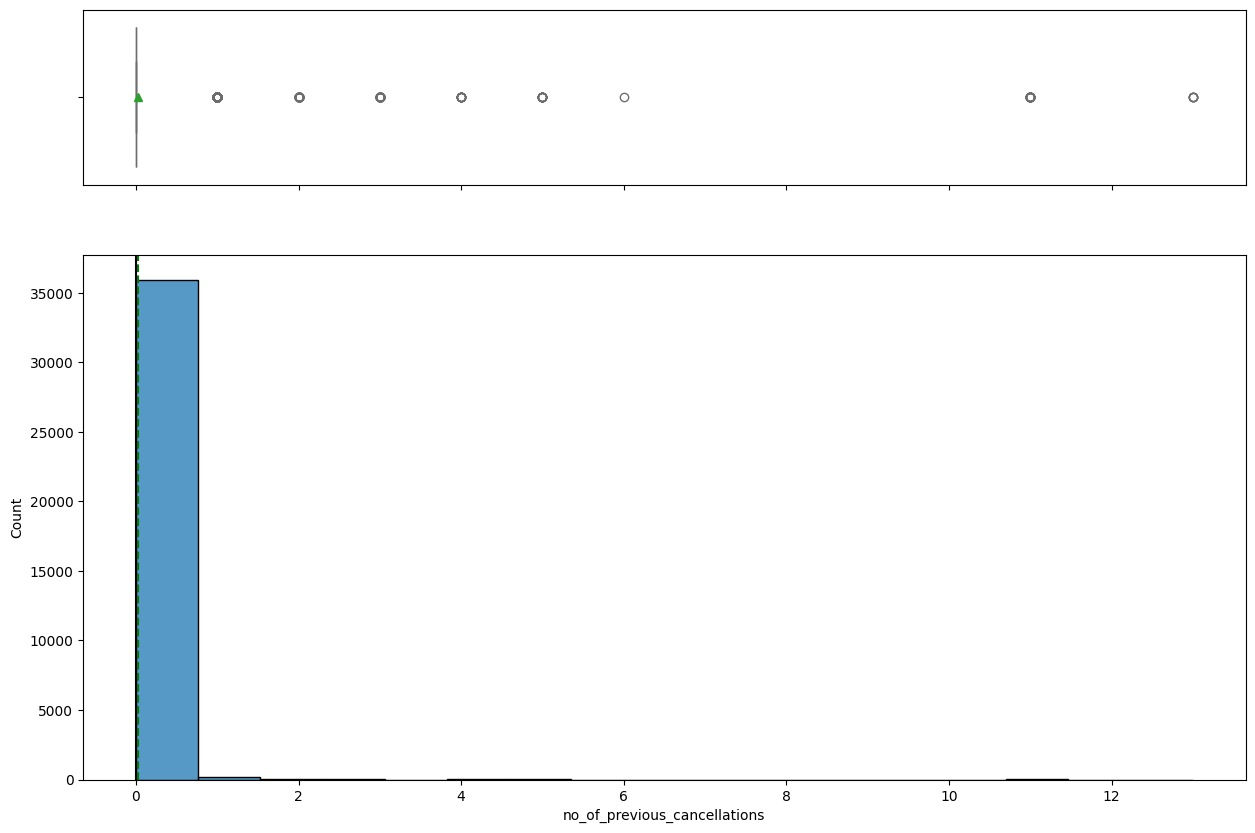

In [142]:
histogram_boxplot(data, "no_of_previous_cancellations")

**Observation:**
- The mean and the median of the number of previous cancellations are close to zero with large outliers that affect the distribution.

### number of previous bookings not canceled

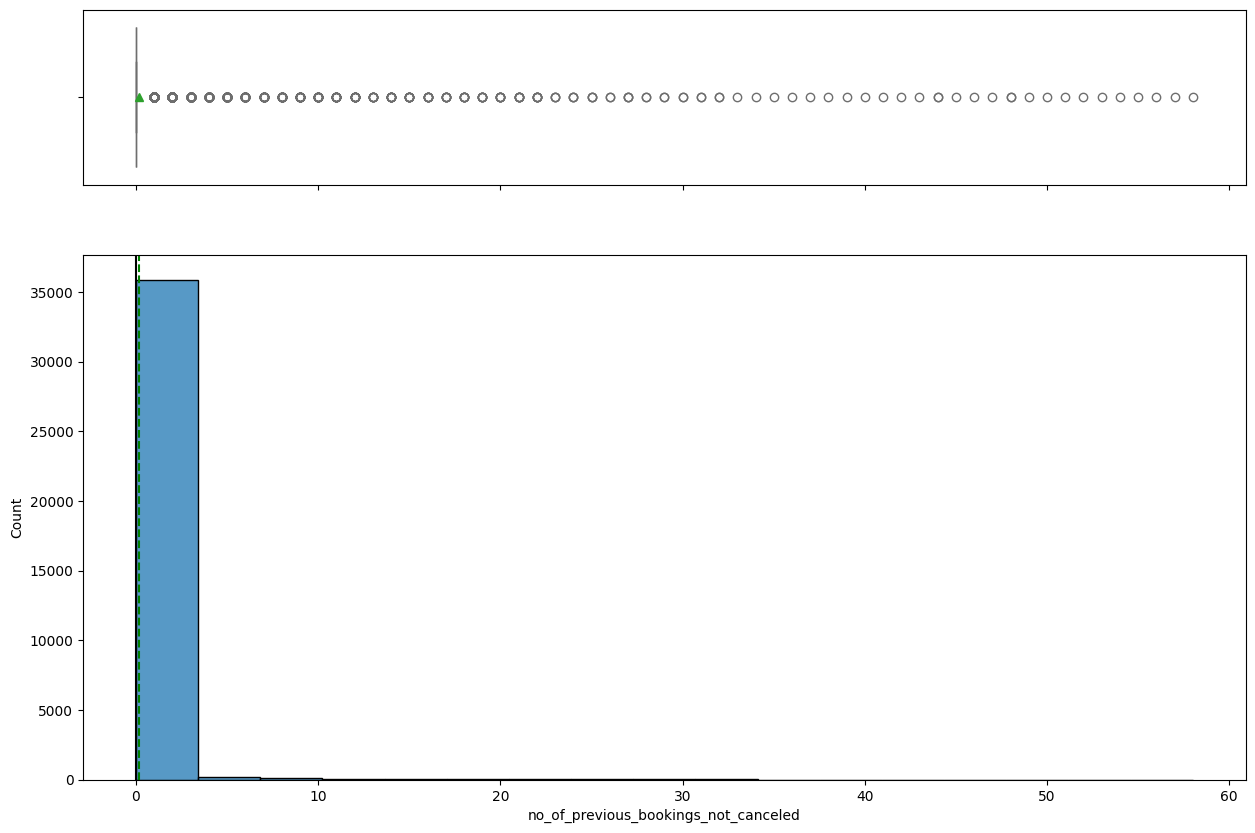

In [143]:
histogram_boxplot(data, "no_of_previous_bookings_not_canceled")

**Observation:**
- The mean and the median of the number of previous not cancellations are close to zero with large outliers that affect the distribution.

### Average price per room

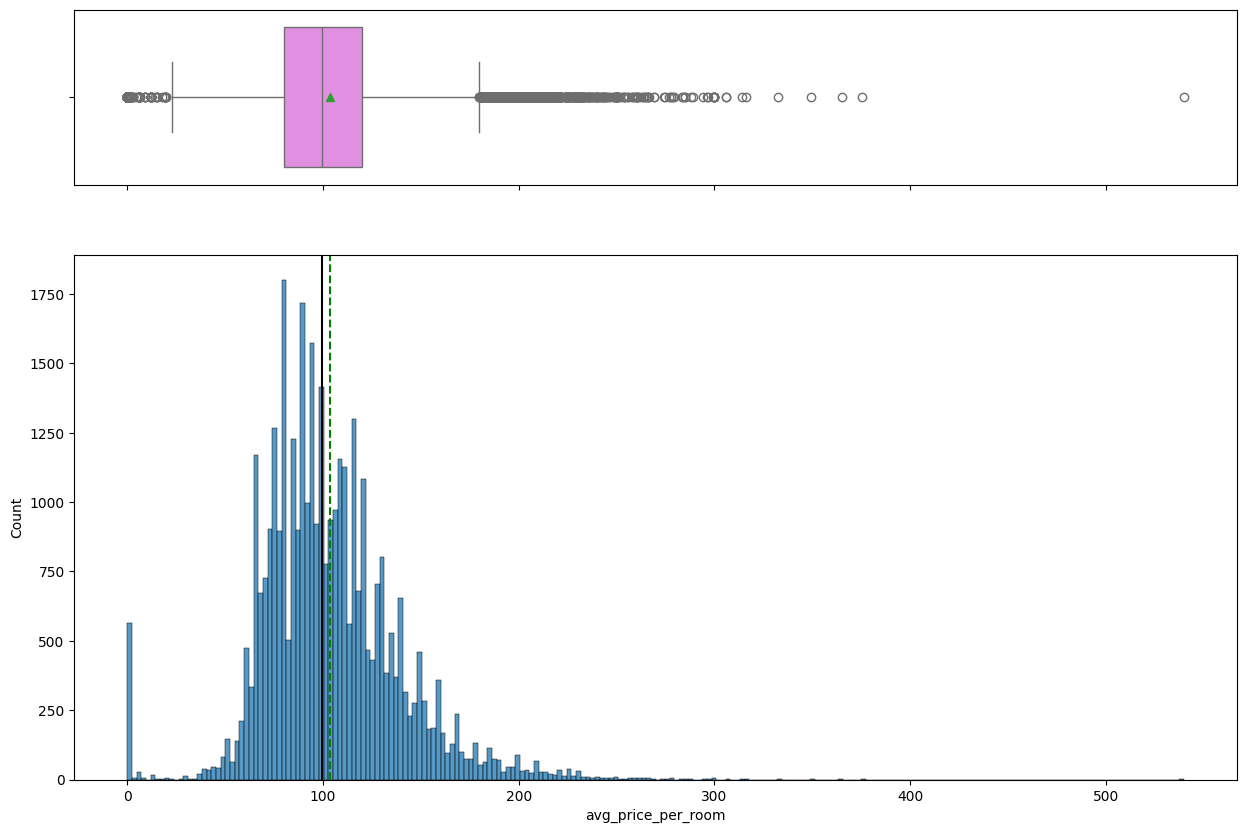

In [144]:
histogram_boxplot(data, "avg_price_per_room")

**Observation:**
- The mean of the price per room is about 103 and the medeian is almost 100. The distribution shape is symmetric with some low outliers and lots of large outliers.

### Bivariate Analysis

In [145]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [146]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

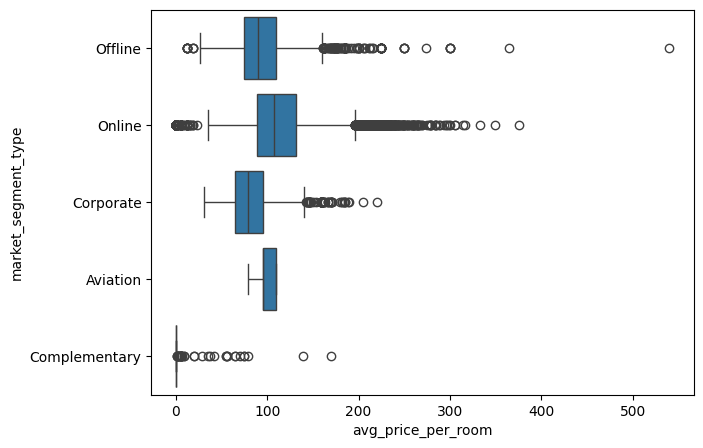

In [147]:
# What are the differences in room prices in different market segments?
plt.figure(figsize=(7,5))
sns.boxplot(data=data, x = "avg_price_per_room", y = "market_segment_type")
plt.show()

In [148]:
data.groupby(['market_segment_type']).avg_price_per_room.mean()

market_segment_type
Aviation        100.70400
Complementary     3.14176
Corporate        82.91174
Offline          91.63268
Online          112.25685
Name: avg_price_per_room, dtype: float64

**Observations:**
- From the box plot we can say there are differences in room prices in different market segments.
- The average price per room in the aviation and online around 100 while the average price for corporate and offline are 83 and 92 respectively. However, corporate has the owest average only 3.14.

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930
------------------------------------------------------------------------------------------------------------------------


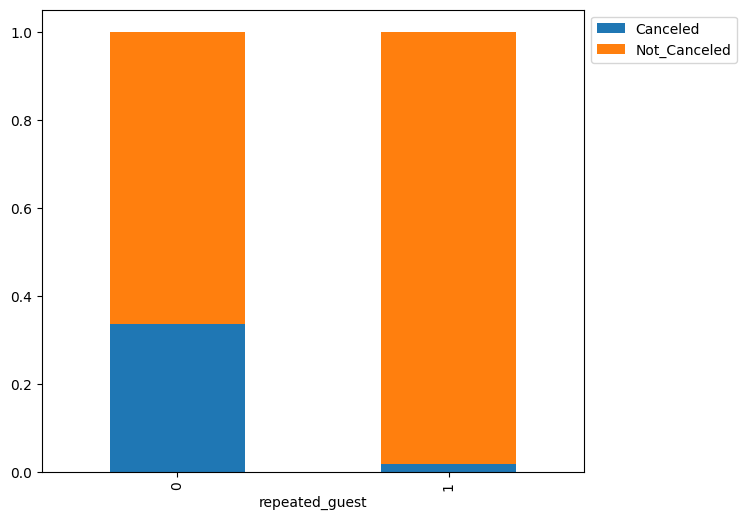

In [149]:
# What percentage of repeating guests cancel?
stacked_barplot(data, "repeated_guest", "booking_status")

**Observations:**
- From the graph we can say that the percentage of repeating guests cancel is very low only 1.7% (16 out of 930 repeating guests

booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                        11885         24390  36275
0                           8545         11232  19777
1                           2703          8670  11373
2                            637          3727   4364
3                              0           675    675
4                              0            78     78
5                              0             8      8
------------------------------------------------------------------------------------------------------------------------


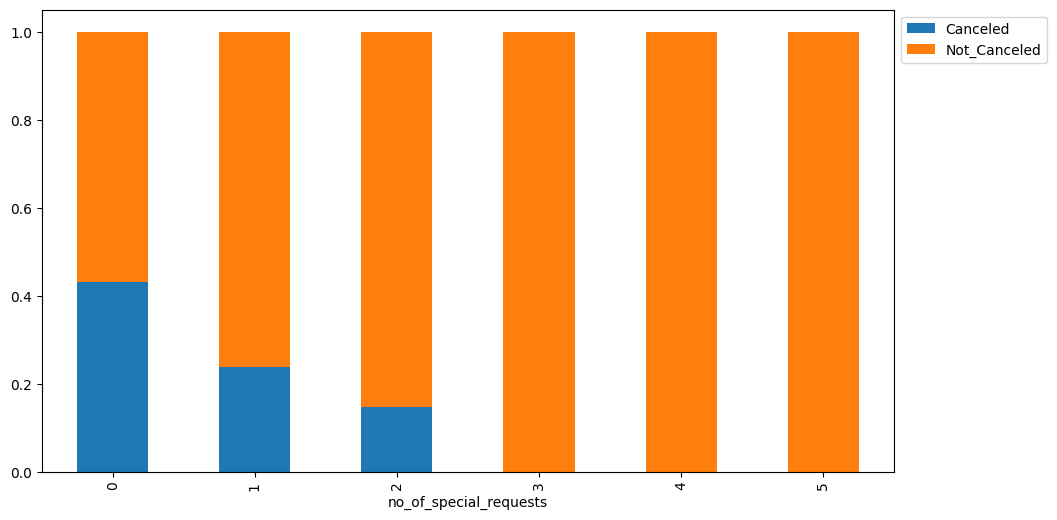

In [150]:
#Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?
stacked_barplot(data, "no_of_special_requests", "booking_status")

**Observation:**
- From the box plot the special requirements when booking a hotel room dont affect the booking cancellation since customers with no request are tend to cancel more than others.

### check the percentage of bookings canceled in each year

booking_status  Canceled  Not_Canceled    All
arrival_year                                 
All                11885         24390  36275
2018               10924         18837  29761
2017                 961          5553   6514
------------------------------------------------------------------------------------------------------------------------


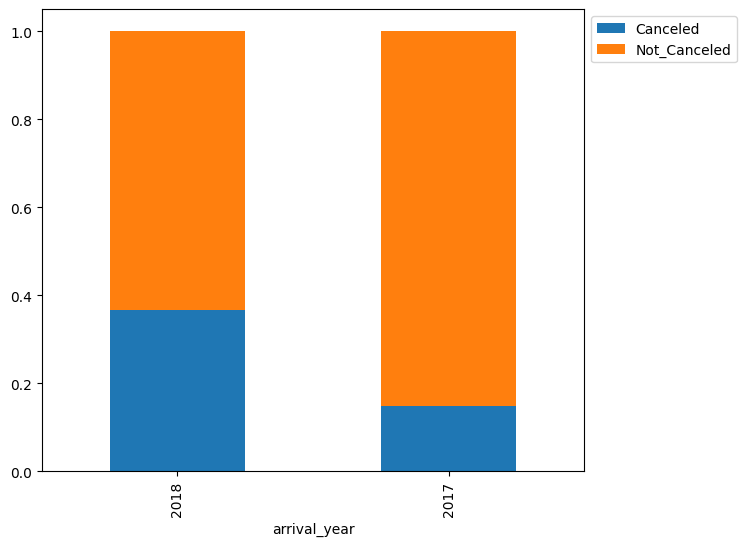

In [151]:
stacked_barplot(data, "arrival_year", "booking_status")

**Observation:**
- The percentage of canceled booking in 2018 is double the percentage in 2017.

### check the percentage of bookings canceled in each month

booking_status  Canceled  Not_Canceled    All
arrival_month                                
All                11885         24390  36275
10                  1880          3437   5317
9                   1538          3073   4611
8                   1488          2325   3813
7                   1314          1606   2920
6                   1291          1912   3203
4                    995          1741   2736
5                    948          1650   2598
11                   875          2105   2980
3                    700          1658   2358
2                    430          1274   1704
12                   402          2619   3021
1                     24           990   1014
------------------------------------------------------------------------------------------------------------------------


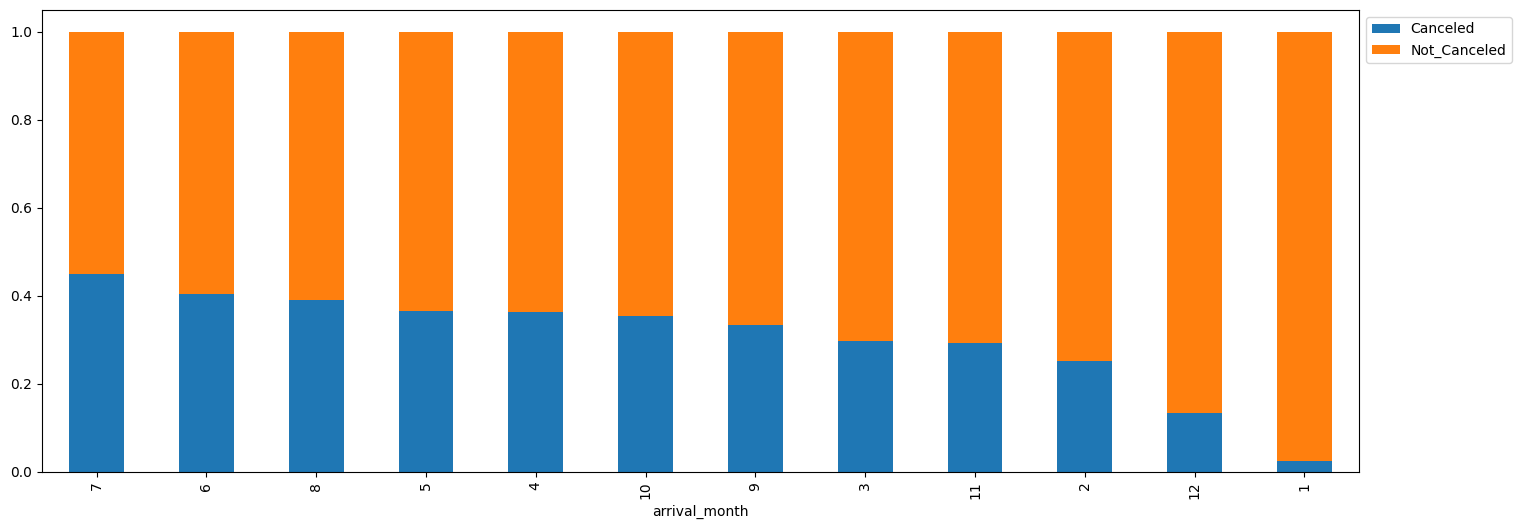

In [152]:
stacked_barplot(data, "arrival_month", "booking_status")

**Observation:**
- The percentage of canceled booking during the summer (6,7,8) is higher than the winter.

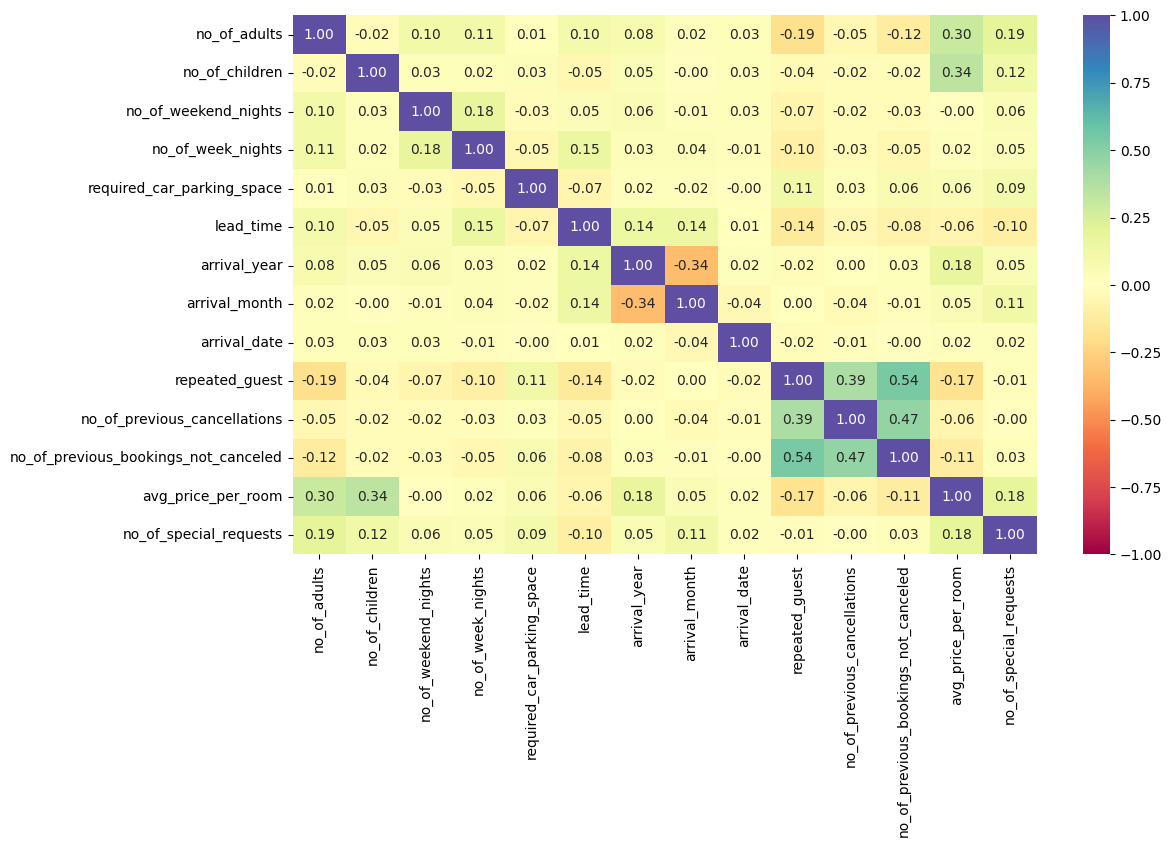

In [153]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Observation:**

- There is no significant correlation between the columns.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

###  Missing Values

In [154]:
# checking for null values
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

**Observations:**
- There are no missing values.

In [155]:
#Drop booking ID
data.drop(["Booking_ID"], axis=1, inplace=True)
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


### Outlier Detection

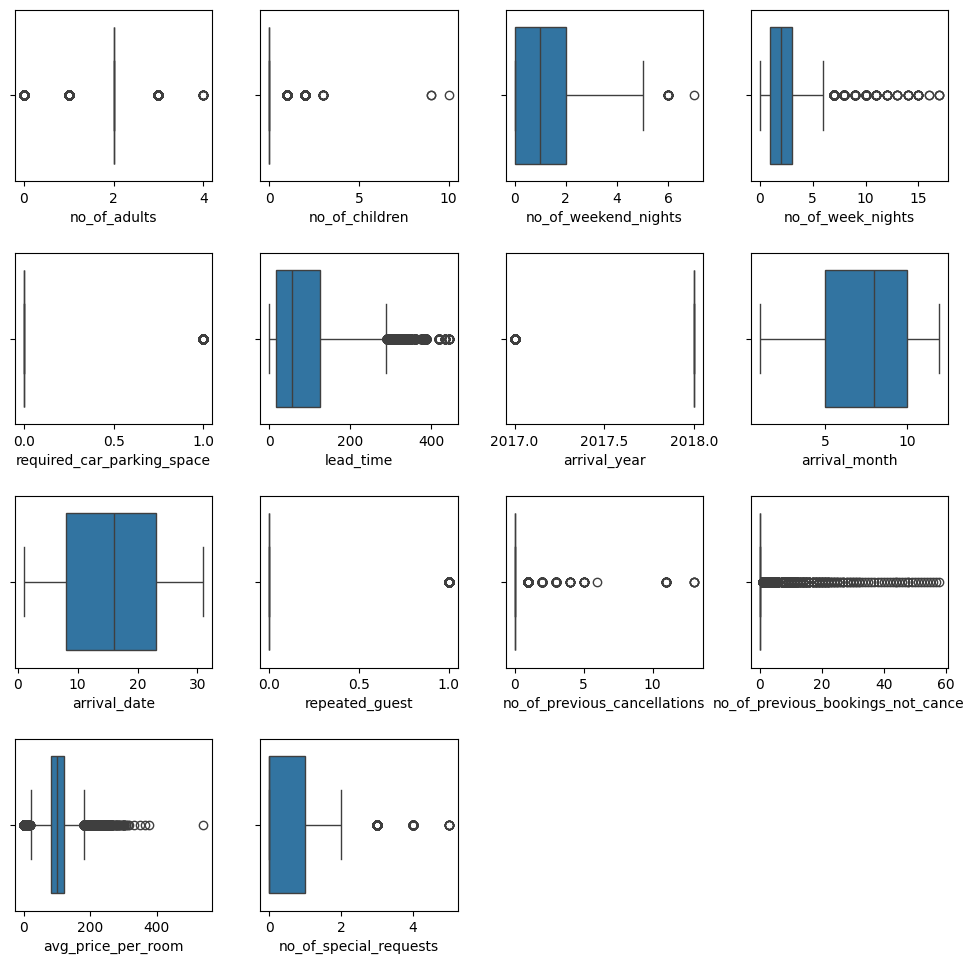

In [156]:
# outlier detection using boxplot
num_cols = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 10))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(data=data, x=variable)
    plt.tight_layout(pad=2)

plt.show()

**Observations**
- There are quite a few outliers in the data.
- However, we wont treat the outliers.

### Preparing Data for Modeling

- We'll split the data into train and test to be able to evaluate the model that we build on the train data.
- We'll have to encode categorical features.
- We will build a Logestic Regression model using the train data and then check it's performance

In [157]:
data["booking_status"] = data["booking_status"].apply(lambda x: 1 if x == "Canceled" else 0)

In [158]:
# defining X and y variables
x = data.drop(["booking_status"], axis=1)
y = data["booking_status"]

In [159]:
# let's add the intercept to data
x = sm.add_constant(x)
x.head()

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,1.00000,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0
1,1.00000,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1
2,1.00000,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0
3,1.00000,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0
4,1.00000,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0


In [160]:
# creating dummy variables
x = pd.get_dummies(x,columns = x.select_dtypes(include = ['object','category']).columns.tolist(),
                   drop_first = True
                   )
x.head()


,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,1.00000,2,0,1,2,0,224,2017,10,2,0,0,0,65.00000,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1.00000,2,0,2,3,0,5,2018,11,6,0,0,0,106.68000,1,0,0,1,0,0,0,0,0,0,0,0,0,1
2,1.00000,1,0,2,1,0,1,2018,2,28,0,0,0,60.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1.00000,2,0,0,2,0,211,2018,5,20,0,0,0,100.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1.00000,2,0,1,1,0,48,2018,4,11,0,0,0,94.50000,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [161]:
# splitting the data in 70:30 ratio for train to test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 1)

In [162]:
print("Shape of Training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 28)
Shape of test set :  (10883, 28)
Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


## Building a Logistic Regression model

In [163]:
# fitting logistic regression model
logit = sm.Logit(y_train, x_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Fri, 23 Feb 2024   Pseudo R-squ.:                  0.3293
Time:                        21:54:16   Log-Likelihood:                -10793.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -924.5923    120.817     -7.653      0.000   -1161.390    -687.795
no_of_adults                             0.1135      

**Observations**

- Negative values of the coefficient show that the probability of a person having a salary less than 50K decreases with the increase of the corresponding attribute value.

- Positive values of the coefficient show that the probability of a person having a salary less than 50K increases with the increase of the corresponding attribute value.

- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

### Model Performance Evaluation

**Model can make wrong predictions as**:

1. Predicting a booking is going to be canceled but in reality the booking is not canceled (FP).

2. Predicting a booking is not going to be canceled but in reality the booking is cnceled (FN) .

**Which case is more important?**

- Both the cases are important as:

  - If we predict a booking is going to be canceled but actually the the booking is not canceled then the guest wont be getting good services.

  - If we predict a booking is not going to be canceled but in reality the the booking is canceled the hotel will loss resources (revenue).


**How to reduce this loss?**

- We need to reduce both False Negatives and False Positives

- `f1_score` should be maximized as the greater the f1_score, the higher the chances of reducing both False Negatives and False Positives and identifying both the classes correctly
  

In [164]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [165]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Checking performance on training set

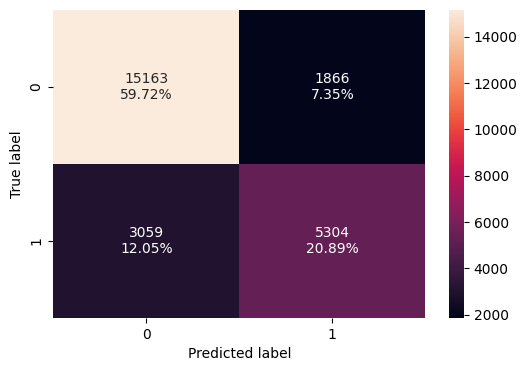

In [166]:
confusion_matrix_statsmodels(lg, x_train, y_train)

In [167]:
print("Training performance:")
model_performance_classification_statsmodels(lg, x_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80604,0.63422,0.73975,0.68293


**Observations**

- The f1_score of the model is 0.68

- The variables used to build the model might contain multicollinearity, which will affect the p-values

* We will have to remove multicollinearity from the data to get reliable coefficients and p-values

### Checking Multicollinearity







- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [168]:
vif_series = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                                  39468156.70600
no_of_adults                                  1.34815
no_of_children                                1.97823
no_of_weekend_nights                          1.06948
no_of_week_nights                             1.09567
required_car_parking_space                    1.03993
lead_time                                     1.39491
arrival_year                                  1.43083
arrival_month                                 1.27567
arrival_date                                  1.00674
repeated_guest                                1.78352
no_of_previous_cancellations                  1.39569
no_of_previous_bookings_not_canceled          1.65199
avg_price_per_room                            2.05042
no_of_special_requests                        1.24728
type_of_meal_plan_Meal Plan 2                 1.27185
type_of_meal_plan_Meal Plan 3                 1.02522
type_of_meal_plan_Not Selected                1

**Observation:**
-  `market_segment_type_Corporat`, `arket_segment_type_Offline`,  and `market_segment_type_Online` exhibit high multicollinearity

In [169]:
#Removing market_segment_type_Online
x_train1 = x_train.drop("market_segment_type_Online", axis=1)

vif_series2 = pd.Series(
    [variance_inflation_factor(x_train1.values, i) for i in range(x_train1.shape[1])],
    index=x_train1.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series2))

Series before feature selection: 

const                                  39391371.31459
no_of_adults                                  1.33178
no_of_children                                1.97735
no_of_weekend_nights                          1.06904
no_of_week_nights                             1.09512
required_car_parking_space                    1.03979
lead_time                                     1.39064
arrival_year                                  1.42838
arrival_month                                 1.27463
arrival_date                                  1.00672
repeated_guest                                1.78019
no_of_previous_cancellations                  1.39545
no_of_previous_bookings_not_canceled          1.65175
avg_price_per_room                            2.04959
no_of_special_requests                        1.24242
type_of_meal_plan_Meal Plan 2                 1.27150
type_of_meal_plan_Meal Plan 3                 1.02522
type_of_meal_plan_Not Selected                1

**Observation:**
- Dropping market_segment_type_Online fixes the multicollinearity.

#### Checking performance on training set

In [170]:
# rebuild the model and cheak the performance

logit2 = sm.Logit(y_train, x_train1.astype(float))
lg2 = logit2.fit(disp=False)

print("Training performance:")
model_performance_classification_statsmodels(lg2, x_train1, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80577,0.63374,0.73929,0.68246


**Observation:**
- No significant change in the model performance.

In [171]:
print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25365
Method:                           MLE   Df Model:                           26
Date:                Fri, 23 Feb 2024   Pseudo R-squ.:                  0.3292
Time:                        21:54:19   Log-Likelihood:                -10794.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -933.3324    120.655     -7.736      0.000   -1169.813    -696.852
no_of_adults                             0.1060      

### Removing high p-value variables

In [172]:
# initial list of columns
cols = x_train1.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train1[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [173]:
x_train2 = x_train1[selected_features]

In [174]:
logit3 = sm.Logit(y_train, x_train2.astype(float))
lg3 = logit3.fit(disp=False)

print(lg3.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Fri, 23 Feb 2024   Pseudo R-squ.:                  0.3283
Time:                        21:54:21   Log-Likelihood:                -10809.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -917.2860    120.456     -7.615      0.000   -1153.376    -681.196
no_of_adults                       0.1086      0.037      2.914      0.

**Observation:**
- Now no categorical feature has p-value greater than 0.05, so we'll consider the features in *X_train2* as the final ones and *lg3* as final model.

### Coefficient Interpretations

- Coefficient of some variables such as no_of_adults, no_of_children and avg_price_per_room are positive an increase in these will lead to increase in chances of a booking is canceled.

- Coefficient of some variables such as required_car_parking_space and some level of room_type_reserved are negative increase in these will lead to decrease in chances of a booking is canceled.

**Converting coefficients to odds**

* The coefficients ($\beta$s) of the logistic regression model are in terms of $log(odds)$ and to find the odds, we have to take the exponential of the coefficients
* Therefore, **$odds =  exp(\beta)$**
* The percentage change in odds is given as $(exp(\beta) - 1) * 100$

In [175]:
# converting coefficients to odds
odds = np.exp(lg3.params)

# finding the percentage change
perc_change_odds = (np.exp(lg3.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=x_train2.columns).T

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Corporate,market_segment_type_Offline
Odds,0.00000,1.11475,1.16436,1.11475,1.04264,0.20305,1.01584,1.57324,0.95853,0.06480,1.25716,1.01935,0.22994,1.17992,1.33089,0.70046,0.75383,0.47940,0.38099,0.23903,0.45258,0.16750
Change_odd%,-100.00000,11.47536,16.43601,11.47526,4.26363,-79.69523,1.58352,57.32351,-4.14725,-93.52026,25.71567,1.93479,-77.00595,17.99156,33.08924,-29.95389,-24.61701,-52.05967,-61.90093,-76.09669,-54.74162,-83.24963


**Coefficient interpretations**

- `no_of_adults`: Holding all other features constant a 1 unit change in no_of_adults will increase the odds of a booking is canceled by 1.1 times or a ~11% increase in odds of a booking is canceled.

- `arrival_month`: Holding all other features constant a 1 unit change in the arrival_month will decrease the odds of a booking is canceled by ~0.96 times or  ~4.14% decrease in odds of a booking is canceled.

- `type_of_meal_plan_Meal Plan 2 `: The odds of a person who is request breakfast & other meal cancel booking is ~1.18 times greater than the person who has breakfast, or ~18% greater odds of canceling booking. Similarly, The odds of a person who has not select a meal is 1.33 times more than the person who has breakfast or ~33% more odds of canceling booking. [the Meal Plan 1 – Breakfast is taken as a reference level]

**Interpretation for other attributes can be done similarly.**

### New Model performance evaluation

#### Checking performance on training set

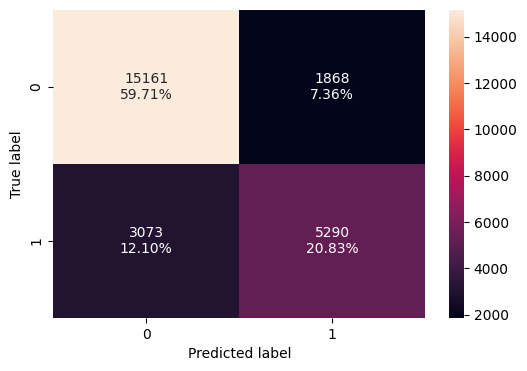

In [176]:
# creating confusion matrix on training set
confusion_matrix_statsmodels(lg3, x_train2, y_train)

In [177]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg3, x_train2, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80541,0.63255,0.73903,0.68166


#### Checking performance on testing set

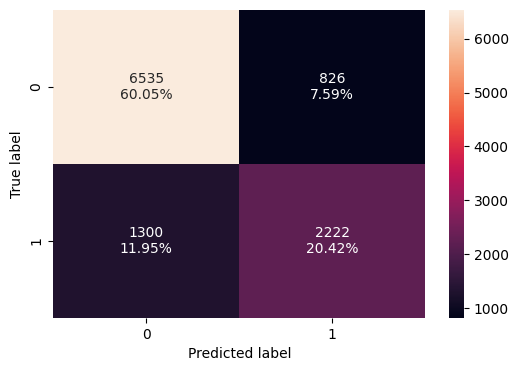

In [178]:
#Test set performance
x_test2 = x_test[list(x_train2.columns)]
# creating confusion matrix
confusion_matrix_statsmodels(lg3, x_test2, y_test)

In [179]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg3, x_test2, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80465,0.63089,0.72900,0.67641


- The model is giving f1_score of ~0.681 and ~0.676 on the train and test sets respectively
- As the train and test performances are comparable, the model is not overfitting
- Moving forward we will try to improve the performance of the model

### Model Performance Improvement

- Let's see if the f1_score can be improved further by changing the model threshold
- First, we will check the ROC curve, compute the area under the ROC curve (ROC-AUC), and then use it to find the optimal threshold
- Next, we will check the Precision-Recall curve to find the right balance between precision and recall as our metric of choice is f1_score

#### ROC Curve and ROC-AUC

##### ROC-AUC on training set

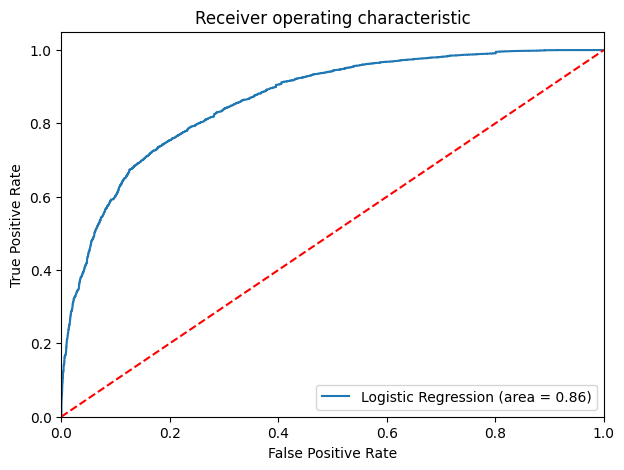

In [180]:
#ROC-AUC on training set

logit_roc_auc_train = roc_auc_score(y_train, lg3.predict(x_train2))
fpr, tpr, thresholds = roc_curve(y_train, lg3.predict(x_train2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

**Observation:**
- Logistic Regression model is giving a good performance on training set.

In [181]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg3.predict(x_train2))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.37104666234890077


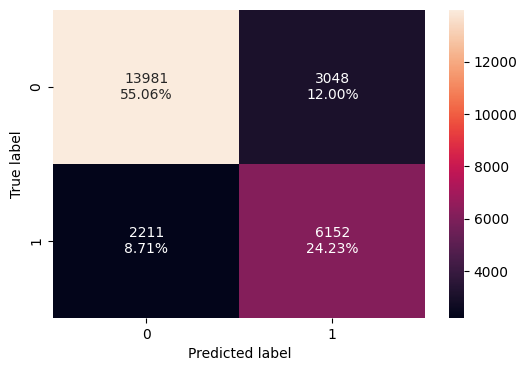

In [182]:
# creating confusion matrix to cheak model performance on training data
confusion_matrix_statsmodels(
    lg3, x_train2, y_train, threshold=optimal_threshold_auc_roc
)

In [183]:
# checking model performance for this model on training data
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg3, x_train2, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.79289,0.73562,0.66870,0.70056


**Observation:**
- F1 of model has increased also the Recall and Precision have increased.
- The model is giving a good performance.

##### ROC-AUC on testing set

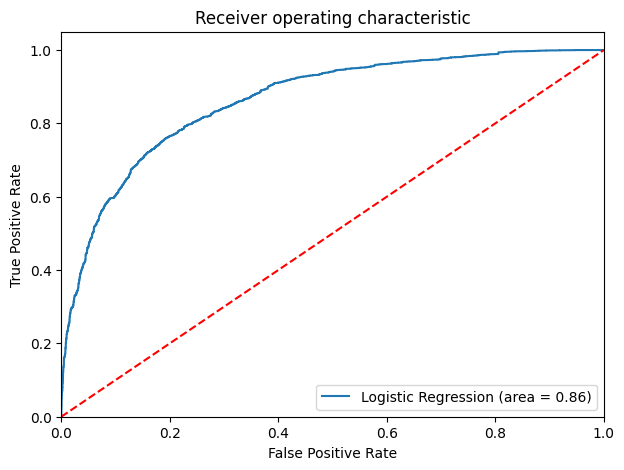

In [184]:
logit_roc_auc_train = roc_auc_score(y_test, lg3.predict(x_test2))
fpr, tpr, thresholds = roc_curve(y_test, lg3.predict(x_test2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

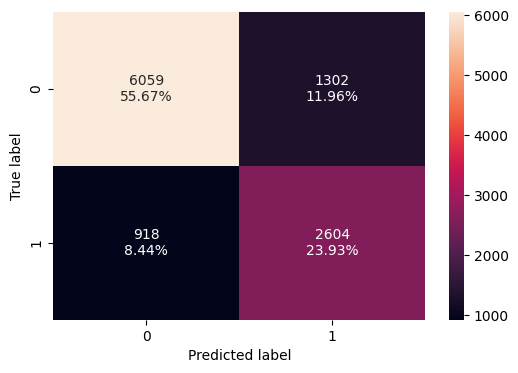

In [185]:
# creating confusion matrix for testing set
confusion_matrix_statsmodels(lg3, x_test2, y_test, threshold=optimal_threshold_auc_roc)

In [186]:
# checking model performance on testing set
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg3, x_test2, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.79601,0.73935,0.66667,0.70113


**Observations:**

- F1 of model has increased but the Recall increased and Precision have decreased.


### Precision-Recall Curve

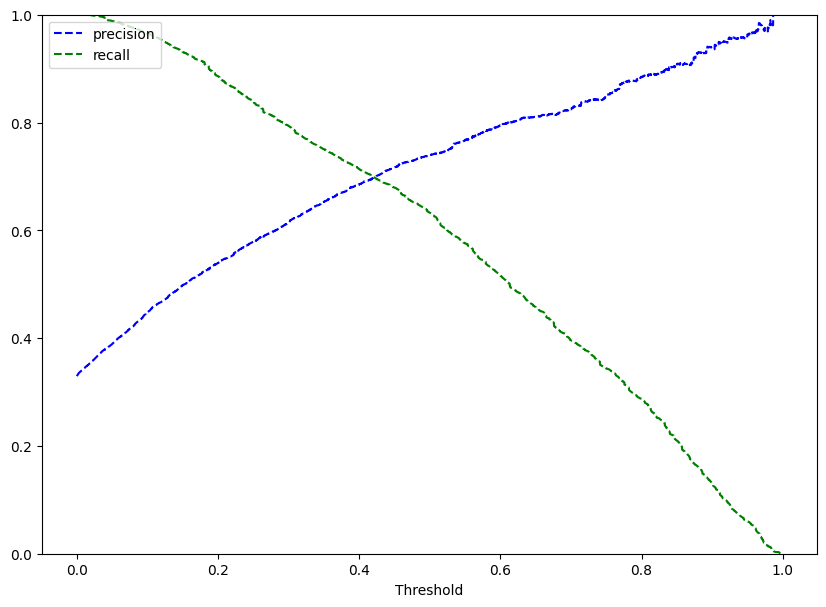

In [187]:
y_scores = lg3.predict(x_train2)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [188]:
# setting the threshold
optimal_threshold_curve = 0.42

**Checking model performance on training set**

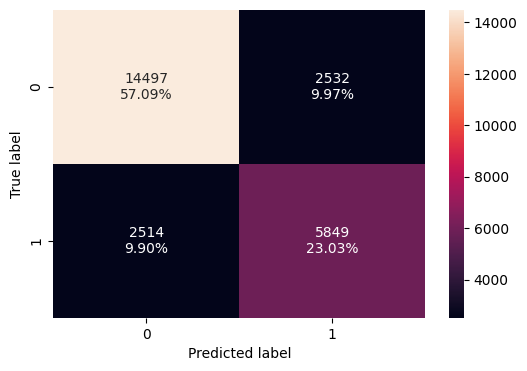

In [189]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, x_train2, y_train, threshold=optimal_threshold_curve)

In [190]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg3, x_train2, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80128,0.69939,0.69789,0.69864


**Checking model performance on testing set**

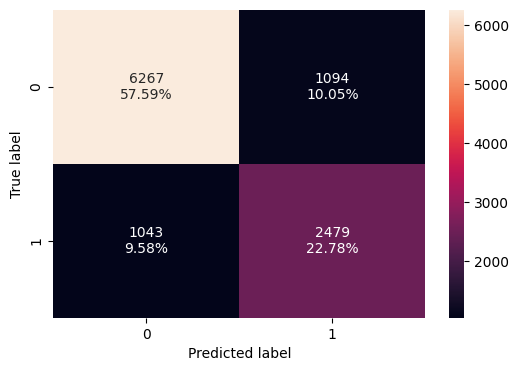

In [191]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, x_test2, y_test, threshold=optimal_threshold_curve)

In [192]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg3, x_test2, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80364,0.70386,0.69381,0.69880


## Final Model Summary

In [193]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80541,0.79289,0.80128
Recall,0.63255,0.73562,0.69939
Precision,0.73903,0.66870,0.69789
F1,0.68166,0.70056,0.69864


In [194]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80465,0.79601,0.80364
Recall,0.63089,0.73935,0.70386
Precision,0.72900,0.66667,0.69381
F1,0.67641,0.70113,0.69880


- Almost all the three models are performing well on both training and test data without the problem of overfitting
- The model with a default threshold (0.76) is giving the best F1 score.

## Building a Decision Tree model

In [195]:
model = DecisionTreeClassifier(random_state=1, class_weight="balanced")
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

- In this case, we set class_weight = "balanced", which will automatically adjust the weights to be inversely proportional to the class frequencies in the input data

### Model Evaluation

In [196]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [197]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Checking performance on training set

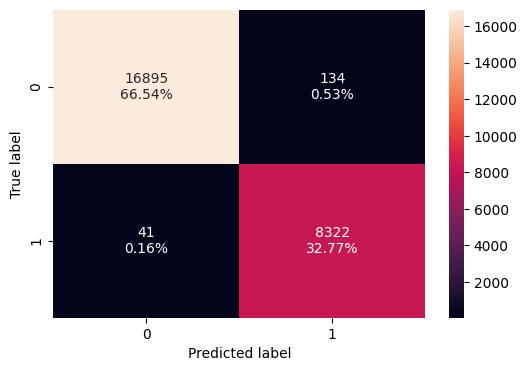

In [198]:
confusion_matrix_sklearn(model, x_train, y_train)

In [199]:
decision_tree_perf_train_without = model_performance_classification_sklearn(
    model, x_train, y_train
)
decision_tree_perf_train_without

,Accuracy,Recall,Precision,F1
0,0.99311,0.99510,0.98415,0.98960


#### Checking performance on testing set

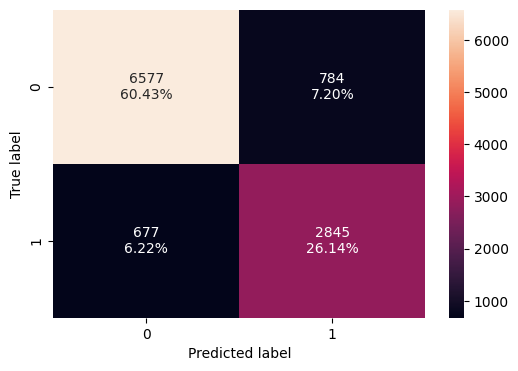

In [200]:
confusion_matrix_sklearn(model, x_test, y_test)

In [201]:
decision_tree_perf_test_without = model_performance_classification_sklearn(
    model, x_test, y_test
)
decision_tree_perf_test_without

,Accuracy,Recall,Precision,F1
0,0.86575,0.80778,0.78396,0.79569


- There is disparity in performance of model on training set and testing set, which suggests that the model is overfiiting.

## Do we need to prune the tree?

### Decision Tree (Pre-pruning)

In [202]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "class_weight": [None, "balanced"],
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

#### Checking performance on training set

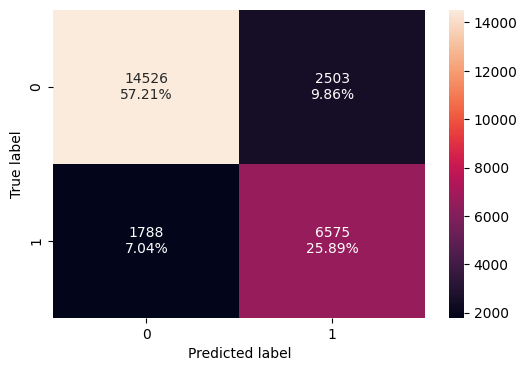

In [203]:
confusion_matrix_sklearn(estimator, x_train, y_train)

In [204]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, x_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.83101,0.78620,0.72428,0.75397


#### Checking performance on testing set

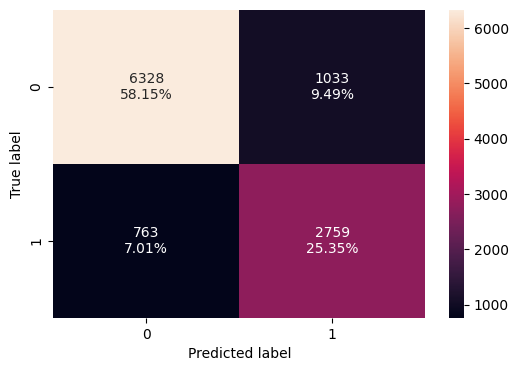

In [205]:
confusion_matrix_sklearn(estimator, x_test, y_test)

In [206]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, x_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.83497,0.78336,0.72758,0.75444


- F1 in the train model and the test model are 0.75 which is good. In addition, the diffference between recall and precision in both models are too small which indicate no overfitting model.

#### tVisulaizing Decision Tree

In [207]:
feature_names = list(x_train.columns)
importances = estimator.feature_importances_
indices = np.argsort(importances)

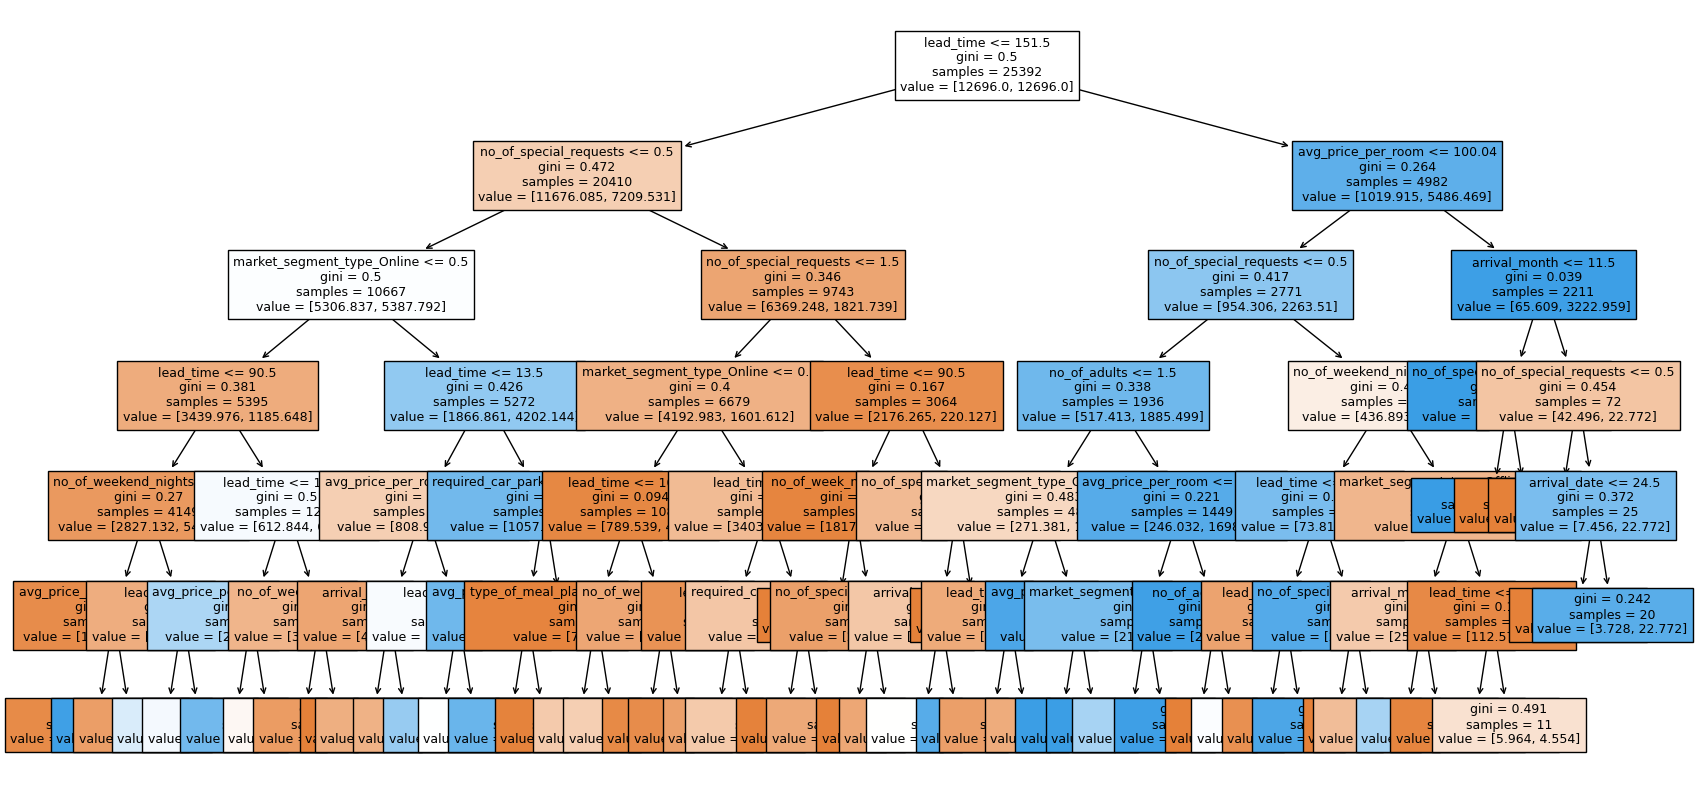

In [208]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [209]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- weights: [1736.39, 132.08] class: 0
|   |   |   |   |   |--- avg_price_per_room >  196.50
|   |   |   |   |   |   |--- weights: [0.75, 25.81] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- weights: [960.27, 223.16] class: 0
|   |   |   |   |   |--- lead_time >  68.50
|   |   |   |   |   |   |--- weights: [129.73, 160.92] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [214.72, 227.72] class: 1
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: [82.76, 285.41] 

**Observations from the pre-pruned tree:**

Using the above extracted decision rules we can make interpretations from the decision tree model like:

- If lead_time <= 151.50, no_of_special_requests <= 0.50, market_segment_type_Online <= 0.50, lead_time <= 90.50,
no_of_weekend_nights <= 0.50, and avg_price_per_room >  196.50 then the booking is most likey to cancel.

- If lead_time <= 151.50, no_of_special_requests <= 0.50, market_segment_type_Online <= 0.50 the lead_time <= 90.50,
no_of_weekend_nights > 0.50, lead_time > 68.50 then the booking is most likey to cancel.

`Interpretations from other decision rules can be made similarly`


In [210]:
importances = estimator.feature_importances_
importances

array([0.        , 0.02691882, 0.        , 0.02058904, 0.00699927,
       0.01410054, 0.47554582, 0.        , 0.01412465, 0.00076035,
       0.        , 0.        , 0.        , 0.07623326, 0.16917567,
       0.        , 0.        , 0.00094952, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.0100065 , 0.18459655])

#### The Importance Features

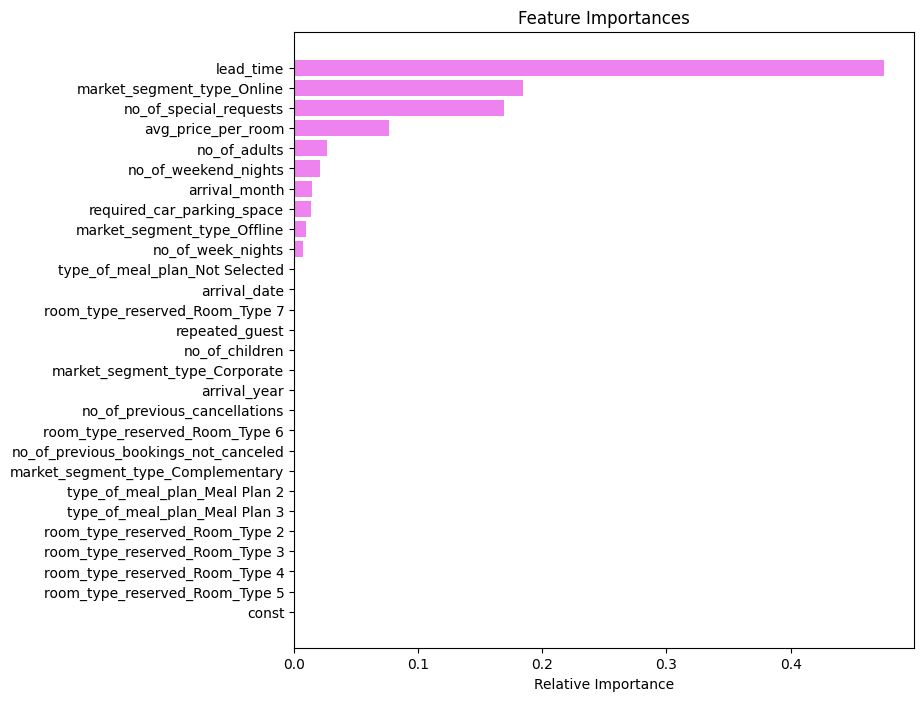

In [211]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- In the pre tuned decision tree, the most important features are lead time, market_segment_type_online, no_of_special_request, avg_price_per_room, no_of_adult, no_of_weekend_night, arrival_month, required_car_parking_space, market_segment_type_offline and no_of_week_night

### Decision Tree (Post pruning)

In [212]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [213]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,0.00838
1,0.00000,0.00838
2,0.00000,0.00838
3,0.00000,0.00838
4,0.00000,0.00838
...,...,...
1839,0.00890,0.32806
1840,0.00980,0.33786
1841,0.01272,0.35058
1842,0.03412,0.41882


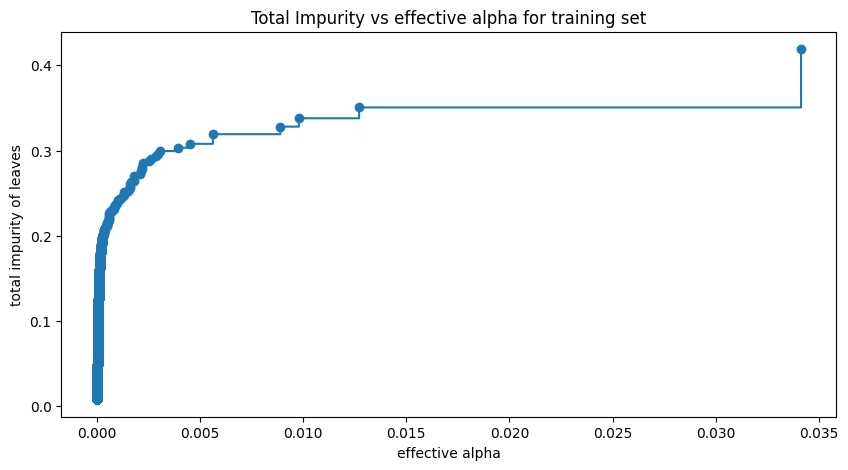

In [214]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [215]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(x_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08117914389136943


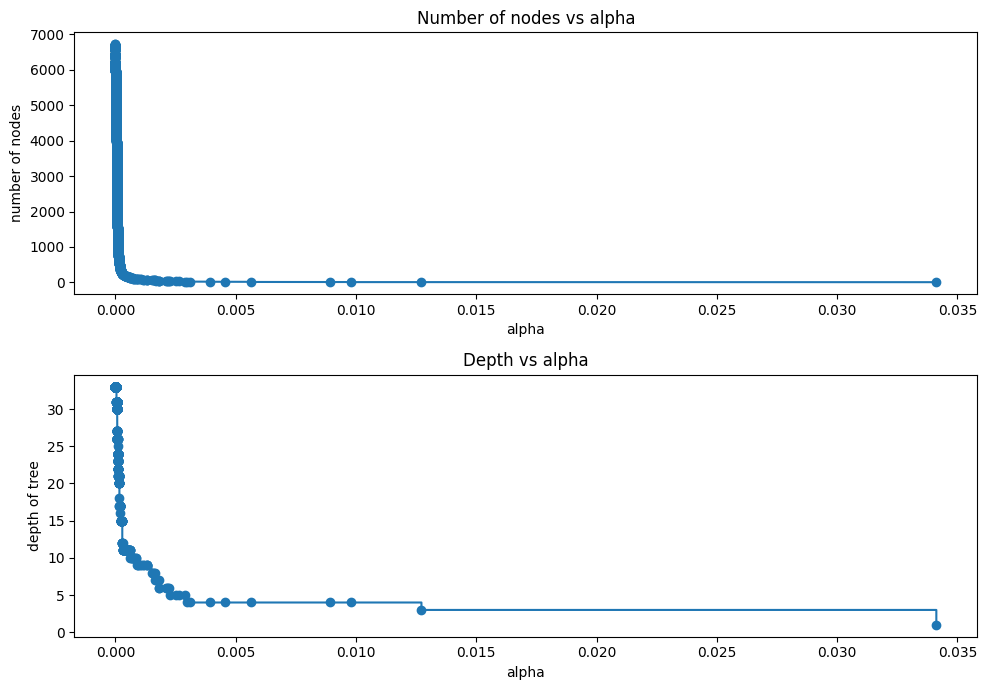

In [216]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

#### F1 Score vs alpha for training and testing sets

In [217]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(x_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

In [218]:
f1_test = []
for clf in clfs:
    pred_test = clf.predict(x_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

In [219]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

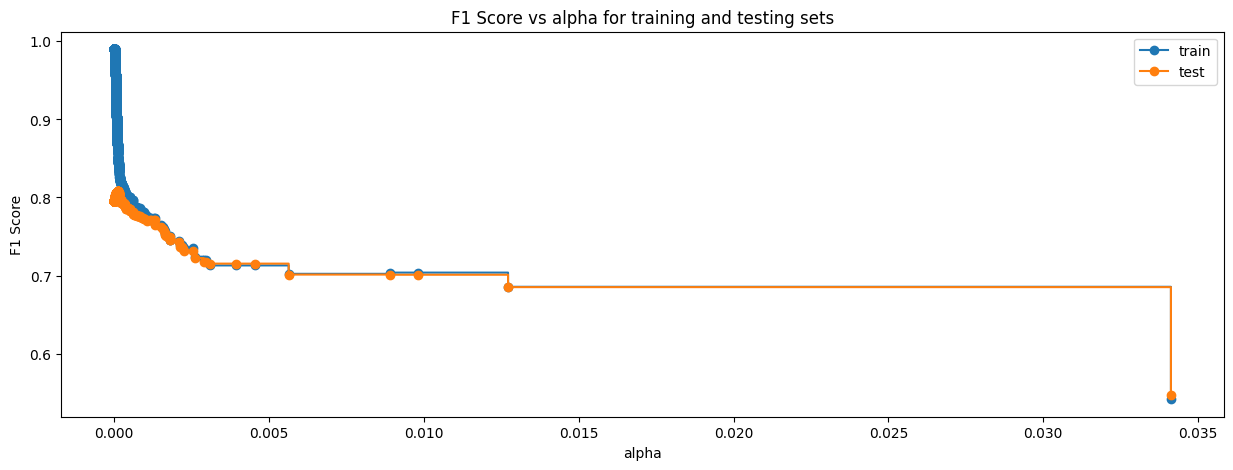

In [220]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [221]:
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00012267633155167002,
                       class_weight='balanced', random_state=1)


**Performing on the training set**

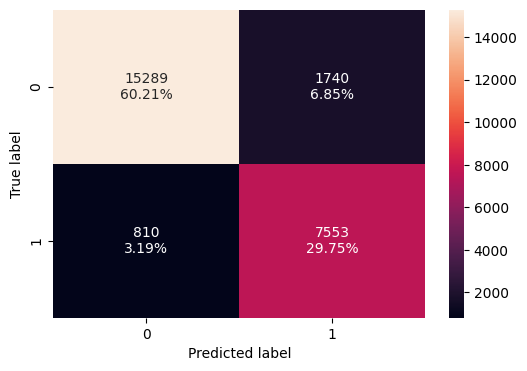

In [222]:
confusion_matrix_sklearn(best_model, x_train, y_train)

In [223]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, x_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.89957,0.90314,0.81276,0.85557


**Performing on the testing set**

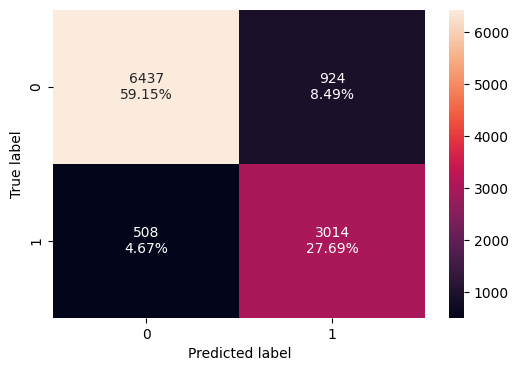

In [224]:
confusion_matrix_sklearn(best_model, x_test, y_test)

In [225]:
decision_tree_post_test = model_performance_classification_sklearn(
    best_model, x_test, y_test
)
decision_tree_post_test

,Accuracy,Recall,Precision,F1
0,0.86842,0.85576,0.76536,0.80804


#### Visualizing the tree

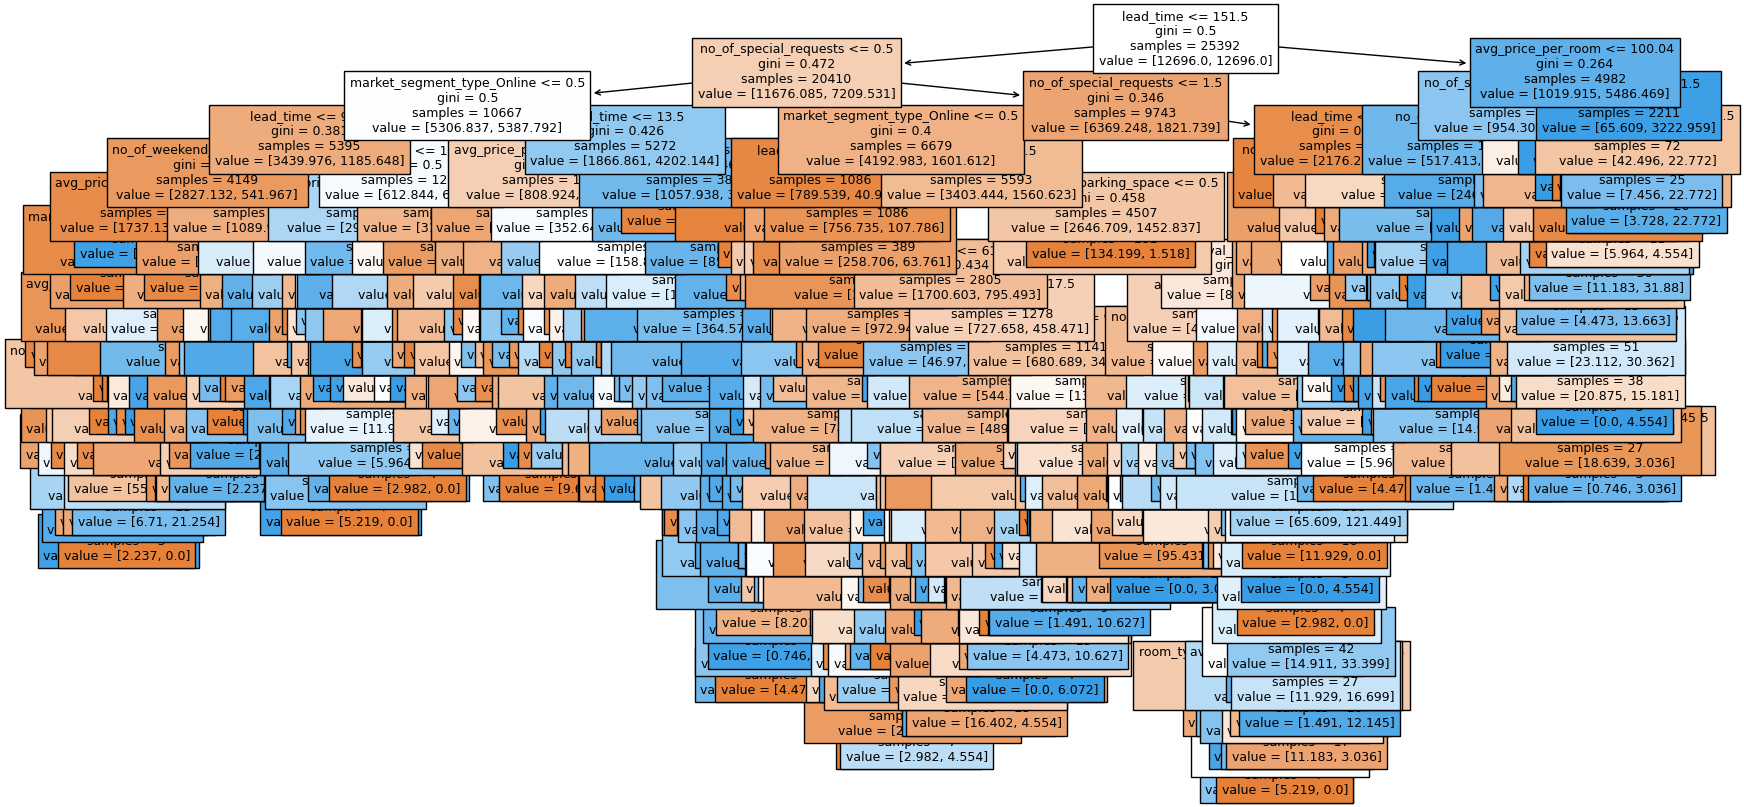

In [226]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [227]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))


|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |

#### The Importance Features

In [228]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

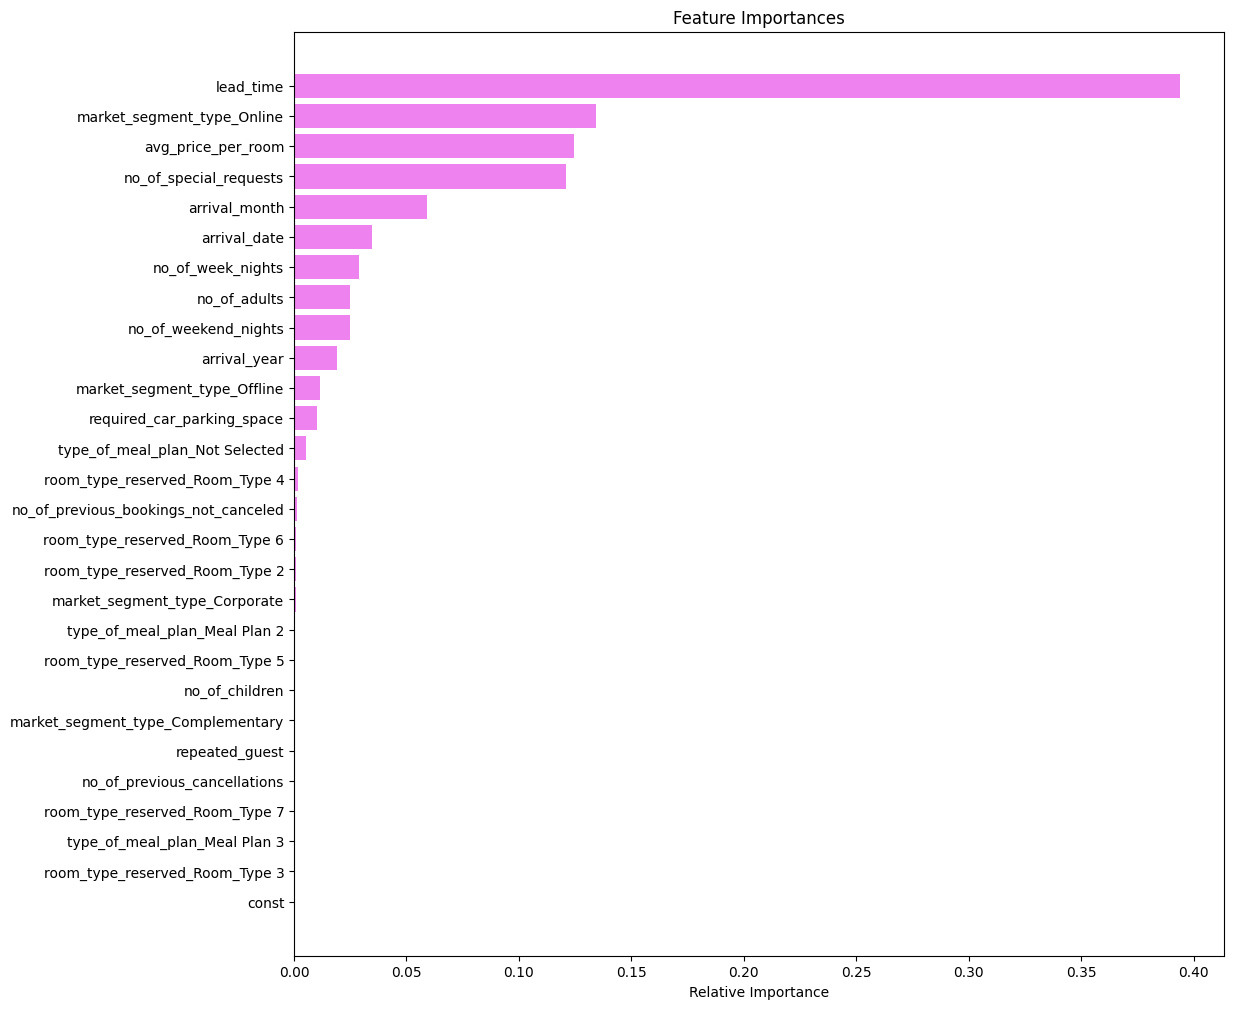

In [229]:
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* In the post tuned decision tree, some of the most important features are simillar to the pre tuned decision tree such as lead time, market_segment_type_online, no_of_special_request, avg_price_per_room, no_of_adult, no_of_weekend_night, arrival_month, required_car_parking_space, market_segment_type_offline and no_of_week_night. Beside that there are others important features such as arrival_year type_of_meal_plan_notselected and arrival_month.

## Model Performance Comparison and Conclusions

In [230]:
# training performance comparison

models_train_comp_df = pd.concat(
    [

        decision_tree_perf_train_without.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [

    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.99311,0.83101,0.89957
Recall,0.99510,0.78620,0.90314
Precision,0.98415,0.72428,0.81276
F1,0.98960,0.75397,0.85557


In [231]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test_without.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.86575,0.83497,0.86842
Recall,0.80778,0.78336,0.85576
Precision,0.78396,0.72758,0.76536
F1,0.79569,0.75444,0.80804


**Observation:**

- We will choose the post pruned tree as the best model since it is giving a  high F1 score on the test sets than the others models.

**Conclusion**

After comparing all the logestic models and the desicion tree models, We will choose the post pruned tree as the best model

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

According to the best model and the most important features in the model we suggest that:

- Keep the prices low in the months of high demand (during summer) to reduce the likelihood of cancellation.
- Create special offers for groups and for long-time staying.
- Put a due date for cancelation.
- Special offers for online booking and restrict policies on cancelation.
- Special offers for non-refundable booking.
- Good customer services and taking care of the special requests.
